# Анализ и оценка признаков для СКАУТ 

In [1]:
# игнорирование предупреждений
import warnings
warnings.simplefilter("ignore")

In [2]:
# распаковка предоставленных данных
import pandas as pd

excel = pd.ExcelFile('data.xlsx',engine = 'openpyxl')
data = excel.parse('1',skiprows=2)
data = data[data['ID'].isnull()==False]

for i in excel.sheet_names[1 : -1]:
    time = excel.parse(i, skiprows = 2)
    data = pd.concat([data, time[time['ID'].isnull()==False]],axis=0)

In [3]:
# отдельно парсим информацию по наставничеству компании
# это связано с отличной структурой страницы и малой информативностью
mentors = excel.parse('Наставники')

In [4]:
data.reset_index(inplace=True)
data.drop('index', axis=1, inplace=True)
data

,ID,Должность,Дата рождения,Пол,Семейное положение,Дата приема,Дата увольнения (если была в отчетном периоде),Наименование отсутствия,Календарные дни отсутствия,Оклад/тариф на конец отчетного периода,Город в адресе регистрации на конец отчетного периода,Количество детей
0,23854332.0,Ведущий инженер,1956-09-16,женский,Разв.,1982-08-19,NaT,NaN,NaN,38600.0,Москва,1.0
1,23854336.0,машинист,1959-08-30,мужской,Жен/ЗМ,2001-10-02,NaT,NaN,NaN,25200.0,Москва,2.0
2,23854339.0,инженер,1979-11-11,мужской,Жен/ЗМ,2001-09-27,NaT,NaN,NaN,42300.0,Москва,1.0
3,23854353.0,начальник смены,1979-05-06,мужской,Жен/ЗМ,2001-10-09,NaT,Прочие отсутствия,1.0,65000.0,Москва,1.0
4,23854358.0,Ведущий инженер,1962-10-03,мужской,Жен/ЗМ,1993-04-02,NaT,NaN,NaN,52500.0,Москва,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
45472,23867211.0,машинист,1994-06-15,мужской,Разв.,2020-12-12,NaT,NaN,NaN,33340.0,Москва,0.0
45473,23867212.0,эксперт,1970-09-24,мужской,Жен/ЗМ,2020-12-12,NaT,NaN,NaN,48720.0,Москва,2.0
45474,23867213.0,машинист,1997-08-06,мужской,Разв.,2020-12-12,NaT,NaN,NaN,33340.0,Москва,0.0
45475,23874344.0,оператор,1996-01-30,мужской,Хол/НЗ,2020-07-07,NaT,NaN,NaN,33340.0,Москва,0.0


In [5]:
#Обогащение данных исходя из дат событий
import numpy as np
data['Возраст'] = data['Дата рождения'].apply(lambda x: np.round((pd.Timestamp('2021-09-25')-x).days / 365.25))
data['Молодая кровь'] = data['Возраст'].apply(lambda x: x<=35)

In [6]:
# Данный признак переведен в int
data.drop('Дата рождения',axis=1,inplace=True)

In [7]:
data

,ID,Должность,Пол,Семейное положение,Дата приема,Дата увольнения (если была в отчетном периоде),Наименование отсутствия,Календарные дни отсутствия,Оклад/тариф на конец отчетного периода,Город в адресе регистрации на конец отчетного периода,Количество детей,Возраст,Молодая кровь
0,23854332.0,Ведущий инженер,женский,Разв.,1982-08-19,NaT,NaN,NaN,38600.0,Москва,1.0,65.0,False
1,23854336.0,машинист,мужской,Жен/ЗМ,2001-10-02,NaT,NaN,NaN,25200.0,Москва,2.0,62.0,False
2,23854339.0,инженер,мужской,Жен/ЗМ,2001-09-27,NaT,NaN,NaN,42300.0,Москва,1.0,42.0,False
3,23854353.0,начальник смены,мужской,Жен/ЗМ,2001-10-09,NaT,Прочие отсутствия,1.0,65000.0,Москва,1.0,42.0,False
4,23854358.0,Ведущий инженер,мужской,Жен/ЗМ,1993-04-02,NaT,NaN,NaN,52500.0,Москва,1.0,59.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45472,23867211.0,машинист,мужской,Разв.,2020-12-12,NaT,NaN,NaN,33340.0,Москва,0.0,27.0,True
45473,23867212.0,эксперт,мужской,Жен/ЗМ,2020-12-12,NaT,NaN,NaN,48720.0,Москва,2.0,51.0,False
45474,23867213.0,машинист,мужской,Разв.,2020-12-12,NaT,NaN,NaN,33340.0,Москва,0.0,24.0,True
45475,23874344.0,оператор,мужской,Хол/НЗ,2020-07-07,NaT,NaN,NaN,33340.0,Москва,0.0,26.0,True


In [8]:
# Сохранение признака смены должности 
# Вычисляется исходя из *должностной* истории
role_changes = {}
for i in data['ID'].value_counts().index:
    if data[data['ID']==i]['Должность'].value_counts().shape[0] > 1:
        role_changes[i]=1
    else:role_changes[i]=0

## Организация деления набора данных

In [9]:
# Для определения уволенных сотрудников, осуществляется сбор дат увольнения в список
list_index = data['Дата увольнения (если была в отчетном периоде)'].value_counts().index
list_index[:10]

DatetimeIndex(['2020-06-30', '2020-06-22', '2020-08-31', '2020-04-27',
               '2020-05-29', '2020-11-06', '2020-07-31', '2020-02-15',
               '2020-02-26', '2020-01-31'],
              dtype='datetime64[ns]', freq=None)

In [10]:
# Добавление бинарной фичи об увольнении
data['Уволен'] = data['Дата увольнения (если была в отчетном периоде)'].apply(lambda x: x in list_index)

In [11]:
# Деление по призанку увольнения
first_data = data[data['Уволен']]
second_data = data[data['Уволен']==False]

# Работа с данными уволенных сотрудников

In [12]:
# Расчёт стажа работы в компании
# Дата увольнения - Дата приема
first_data['Стаж'] = first_data['Дата увольнения (если была в отчетном периоде)'] - first_data['Дата приема']
first_data['Стаж'] = first_data['Стаж'].apply(lambda x: x.days / 365.25)

In [13]:
# Обнуление пропущенных значений
first_data['Наименование отсутствия'].fillna('0', inplace=True)
first_data['Календарные дни отсутствия'].fillna(0, inplace=True)

In [14]:
first_data['Наименование отсутствия'].value_counts().index

Index(['0', 'Отпуск', 'Прочие отсутствия', 'Лист нетрудоспособности',
       'Отпуск ', 'Лист нетрудоспособости', 'Командировка'],
      dtype='object')

In [15]:
# Наблюдается дублирование категориальных данных
# Исправление опечатки удалением пробелом
first_data['Наименование отсутствия'] = first_data['Наименование отсутствия'].apply(lambda x: x.strip())

In [16]:
# Проверка корректности исправления
first_data['Наименование отсутствия'].value_counts()

0                          63
Отпуск                     62
Прочие отсутствия          29
Лист нетрудоспособности    15
Лист нетрудоспособости      2
Командировка                1
Name: Наименование отсутствия, dtype: int64

In [17]:
# Сбор идентификаторов уволенных сотрудников
id_preson = first_data['ID'].value_counts().index

In [18]:
first_data

,ID,Должность,Пол,Семейное положение,Дата приема,Дата увольнения (если была в отчетном периоде),Наименование отсутствия,Календарные дни отсутствия,Оклад/тариф на конец отчетного периода,Город в адресе регистрации на конец отчетного периода,Количество детей,Возраст,Молодая кровь,Уволен,Стаж
427,23856193.0,Специалист,мужской,Жен/ЗМ,1987-02-01,2020-01-10,Отпуск,2.0,28600.0,Москва,2.0,57.0,False,True,32.939083
797,23857746.0,Специалист,женский,Жен/ЗМ,2000-05-12,2020-01-30,Отпуск,2.0,52500.0,Москва,2.0,48.0,False,True,19.718001
798,23857746.0,Специалист,женский,Жен/ЗМ,2000-05-12,2020-01-30,Отпуск,1.0,52500.0,Москва,2.0,48.0,False,True,19.718001
799,23857746.0,Специалист,женский,Жен/ЗМ,2000-05-12,2020-01-30,Отпуск,1.0,52500.0,Москва,2.0,48.0,False,True,19.718001
1298,23860425.0,Специалист,мужской,Жен/ЗМ,1993-05-04,2020-01-12,Отпуск,1.0,38600.0,Москва,1.0,55.0,False,True,26.691307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42138,23856158.0,Специалист,мужской,Жен/ЗМ,1996-01-02,2020-12-13,Лист нетрудоспособности,13.0,67080.0,Москва,1.0,49.0,False,True,24.947296
42435,23857336.0,Специалист,женский,Жен/ЗМ,1985-07-19,2020-12-09,Лист нетрудоспособности,8.0,26010.0,Москва,2.0,61.0,False,True,35.392197
42436,23857336.0,Специалист,женский,Жен/ЗМ,1985-07-19,2020-12-09,Отпуск,1.0,26010.0,Москва,2.0,61.0,False,True,35.392197
43021,23860388.0,Специалист,мужской,Разв.,1998-01-07,2020-12-25,0,0.0,26010.0,Москва,2.0,69.0,False,True,22.965092


In [19]:
# Удаление дублей с суммирование отгулов(не отпуска)
result = pd.DataFrame(columns=first_data.columns)
for step,i in enumerate(id_preson):
    time = first_data[first_data['ID']==i]
    a = np.array(time.iloc[0])
    a[7] = sum(time[time['Наименование отсутствия'] != 'Отпуск']['Календарные дни отсутствия'])
    result.loc[step] = a

In [20]:
# Удаление переведенной в стаж фичи
result.drop(['Дата приема'], axis=1,inplace=True)

In [21]:
result

,ID,Должность,Пол,Семейное положение,Дата увольнения (если была в отчетном периоде),Наименование отсутствия,Календарные дни отсутствия,Оклад/тариф на конец отчетного периода,Город в адресе регистрации на конец отчетного периода,Количество детей,Возраст,Молодая кровь,Уволен,Стаж
0,23866494.0,инженер,мужской,Жен/ЗМ,2020-06-30,Отпуск,10.0,36800.0,Москва,3.0,43.0,False,True,4.542094
1,23866000.0,Специалист,мужской,Разв.,2020-06-22,Лист нетрудоспособности,25.0,36800.0,Москва,0.0,40.0,False,True,7.586585
2,23866675.0,Специалист,мужской,Разв.,2020-10-25,Лист нетрудоспособости,15.0,37980.0,Москва,1.0,37.0,False,True,2.995209
3,23855987.0,Специалист,мужской,Жен/ЗМ,2020-11-20,Лист нетрудоспособности,5.0,25800.0,Москва,2.0,60.0,False,True,30.143737
4,23862167.0,Специалист,мужской,Жен/ЗМ,2020-04-27,Отпуск,0.0,33600.0,Москва,2.0,66.0,False,True,26.652977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,23859806.0,машинист,мужской,Жен/ЗМ,2021-03-21,0,0.0,22300.0,Москва,3.0,63.0,False,True,33.054073
126,23859810.0,Специалист,женский,Жен/ЗМ,2020-08-04,0,0.0,36800.0,Москва,1.0,43.0,False,True,22.877481
127,23865736.0,Специалист,мужской,Жен/ЗМ,2020-11-29,0,0.0,37980.0,Москва,1.0,36.0,False,True,9.423682
128,23866473.0,инженер,мужской,Жен/ЗМ,2020-08-31,0,0.0,36800.0,Москва,0.0,33.0,True,True,4.878850


In [22]:
# Фиксация сезонности увольнений
season_dict = {}
for i in range(1,13):
    if i in [12,1,2]:
        season_dict[i] = 1
    elif i in [3,4,5]:
        season_dict[i] = 2
    elif i in [6,7,8]:
        season_dict[i] = 3
    elif i in [9,10,11]:
        season_dict[i] = 4
        
result['Сезон'] = result['Дата увольнения (если была в отчетном периоде)'].apply(lambda x: season_dict[int(x.month)])

In [23]:
# Проверка корректности
result['Сезон'].value_counts()

3    39
4    32
1    30
2    29
Name: Сезон, dtype: int64

In [24]:
result.drop('Дата увольнения (если была в отчетном периоде)',axis=1,inplace=True)

# Работа с действующими сотрудниками

In [25]:
# обнуление пропусков
second_data['Наименование отсутствия'].fillna('0', inplace=True)
second_data['Календарные дни отсутствия'].fillna(0, inplace=True)
second_data['Сезон'] = [0]*second_data.shape[0]

In [26]:
# Заполняем Стаж.
second_data['Стаж'] = second_data['Дата приема'].apply(lambda x: np.round((pd.Timestamp('2021-09-25')-x).days / 365.25))
second_data.drop('Дата приема', axis=1, inplace=True)
second_data.drop('Дата увольнения (если была в отчетном периоде)', axis=1, inplace=True)
second_data

,ID,Должность,Пол,Семейное положение,Наименование отсутствия,Календарные дни отсутствия,Оклад/тариф на конец отчетного периода,Город в адресе регистрации на конец отчетного периода,Количество детей,Возраст,Молодая кровь,Уволен,Сезон,Стаж
0,23854332.0,Ведущий инженер,женский,Разв.,0,0.0,38600.0,Москва,1.0,65.0,False,False,0,39.0
1,23854336.0,машинист,мужской,Жен/ЗМ,0,0.0,25200.0,Москва,2.0,62.0,False,False,0,20.0
2,23854339.0,инженер,мужской,Жен/ЗМ,0,0.0,42300.0,Москва,1.0,42.0,False,False,0,20.0
3,23854353.0,начальник смены,мужской,Жен/ЗМ,Прочие отсутствия,1.0,65000.0,Москва,1.0,42.0,False,False,0,20.0
4,23854358.0,Ведущий инженер,мужской,Жен/ЗМ,0,0.0,52500.0,Москва,1.0,59.0,False,False,0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45472,23867211.0,машинист,мужской,Разв.,0,0.0,33340.0,Москва,0.0,27.0,True,False,0,1.0
45473,23867212.0,эксперт,мужской,Жен/ЗМ,0,0.0,48720.0,Москва,2.0,51.0,False,False,0,1.0
45474,23867213.0,машинист,мужской,Разв.,0,0.0,33340.0,Москва,0.0,24.0,True,False,0,1.0
45475,23874344.0,оператор,мужской,Хол/НЗ,0,0.0,33340.0,Москва,0.0,26.0,True,False,0,1.0


In [27]:
# сбор идентификаторов
id_preson=second_data['ID'].value_counts().index

In [28]:
# Объединение дублей с суммированием отуглов.
# Берется последняя запись об сотруднике
result2 = pd.DataFrame(columns=second_data.columns)
for step,i in enumerate(id_preson):
    time = second_data[second_data['ID']==i]
    a = np.array(time.iloc[-1])
    a[5] = sum(time[time['Наименование отсутствия'] != 'Отпуск']['Календарные дни отсутствия'])
    result2.loc[step] = a

### Обработанные фреймы

In [29]:
result

,ID,Должность,Пол,Семейное положение,Наименование отсутствия,Календарные дни отсутствия,Оклад/тариф на конец отчетного периода,Город в адресе регистрации на конец отчетного периода,Количество детей,Возраст,Молодая кровь,Уволен,Стаж,Сезон
0,23866494.0,инженер,мужской,Жен/ЗМ,Отпуск,10.0,36800.0,Москва,3.0,43.0,False,True,4.542094,3
1,23866000.0,Специалист,мужской,Разв.,Лист нетрудоспособности,25.0,36800.0,Москва,0.0,40.0,False,True,7.586585,3
2,23866675.0,Специалист,мужской,Разв.,Лист нетрудоспособости,15.0,37980.0,Москва,1.0,37.0,False,True,2.995209,4
3,23855987.0,Специалист,мужской,Жен/ЗМ,Лист нетрудоспособности,5.0,25800.0,Москва,2.0,60.0,False,True,30.143737,4
4,23862167.0,Специалист,мужской,Жен/ЗМ,Отпуск,0.0,33600.0,Москва,2.0,66.0,False,True,26.652977,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125,23859806.0,машинист,мужской,Жен/ЗМ,0,0.0,22300.0,Москва,3.0,63.0,False,True,33.054073,2
126,23859810.0,Специалист,женский,Жен/ЗМ,0,0.0,36800.0,Москва,1.0,43.0,False,True,22.877481,3
127,23865736.0,Специалист,мужской,Жен/ЗМ,0,0.0,37980.0,Москва,1.0,36.0,False,True,9.423682,4
128,23866473.0,инженер,мужской,Жен/ЗМ,0,0.0,36800.0,Москва,0.0,33.0,True,True,4.878850,3


In [30]:
result2

,ID,Должность,Пол,Семейное положение,Наименование отсутствия,Календарные дни отсутствия,Оклад/тариф на конец отчетного периода,Город в адресе регистрации на конец отчетного периода,Количество детей,Возраст,Молодая кровь,Уволен,Сезон,Стаж
0,23866725.0,инженер,женский,Вдов.,Прочие отсутствия,147.0,37980.0,Москва,1.0,40.0,False,False,0,4.0
1,23854589.0,инженер,женский,Жен/ЗМ,Прочие отсутствия,87.0,37980.0,Москва,2.0,42.0,False,False,0,20.0
2,23867127.0,инженер,женский,Жен/ЗМ,Прочие отсутствия,90.0,37980.0,Москва,1.0,37.0,False,False,0,1.0
3,23865739.0,Ведущий инженер,мужской,Жен/ЗМ,Отпуск,12.0,43660.0,Москва,3.0,38.0,False,False,0,10.0
4,23864467.0,Ведущий инженер,женский,Жен/ЗМ,0,46.0,43660.0,Москва,2.0,43.0,False,False,0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3430,23857580.0,слесарь,мужской,Жен/ЗМ,0,0.0,25000.0,Москва,2.0,62.0,False,False,0,34.0
3431,23867185.0,слесарь,мужской,Хол/НЗ,0,0.0,23020.0,Москва,0.0,23.0,True,False,0,1.0
3432,23865867.0,электрослесарь,мужской,Хол/НЗ,Отпуск,21.0,28600.0,Москва,1.0,33.0,True,False,0,9.0
3433,23867192.0,инженер,женский,Жен/ЗМ,0,0.0,37980.0,Москва,1.0,38.0,False,False,0,1.0


# Объединяем наборы для дальнейшего исследования

In [31]:
er = pd.concat([result,result2], axis=0)

In [32]:
er

,ID,Возраст,Город в адресе регистрации на конец отчетного периода,Должность,Календарные дни отсутствия,Количество детей,Молодая кровь,Наименование отсутствия,Оклад/тариф на конец отчетного периода,Пол,Сезон,Семейное положение,Стаж,Уволен
0,23866494.0,43.0,Москва,инженер,10.0,3.0,False,Отпуск,36800.0,мужской,3,Жен/ЗМ,4.542094,True
1,23866000.0,40.0,Москва,Специалист,25.0,0.0,False,Лист нетрудоспособности,36800.0,мужской,3,Разв.,7.586585,True
2,23866675.0,37.0,Москва,Специалист,15.0,1.0,False,Лист нетрудоспособости,37980.0,мужской,4,Разв.,2.995209,True
3,23855987.0,60.0,Москва,Специалист,5.0,2.0,False,Лист нетрудоспособности,25800.0,мужской,4,Жен/ЗМ,30.143737,True
4,23862167.0,66.0,Москва,Специалист,0.0,2.0,False,Отпуск,33600.0,мужской,2,Жен/ЗМ,26.652977,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3430,23857580.0,62.0,Москва,слесарь,0.0,2.0,False,0,25000.0,мужской,0,Жен/ЗМ,34.000000,False
3431,23867185.0,23.0,Москва,слесарь,0.0,0.0,True,0,23020.0,мужской,0,Хол/НЗ,1.000000,False
3432,23865867.0,33.0,Москва,электрослесарь,21.0,1.0,True,Отпуск,28600.0,мужской,0,Хол/НЗ,9.000000,False
3433,23867192.0,38.0,Москва,инженер,0.0,1.0,False,0,37980.0,женский,0,Жен/ЗМ,1.000000,False


In [33]:
# сбор идентификаторов
q = er['ID'].value_counts().index

In [34]:
# устранение дублей в таблицах
# Категориальные фичи *Сезон* и *Уволен* с заполнением пропусков 
# 0 объдиним суммированием. Прогулы тоже суммируем
data = pd.DataFrame(columns=er.columns)
for step,i in enumerate(q):
    time = er[er['ID']==i]
    a = np.array(time.iloc[-1])
    a[4] = sum(time['Календарные дни отсутствия'])
    a[10] = sum(time['Сезон'])
    a[13] = sum(time['Уволен'])
    data.loc[step] = a

In [35]:
# результат
data

,ID,Возраст,Город в адресе регистрации на конец отчетного периода,Должность,Календарные дни отсутствия,Количество детей,Молодая кровь,Наименование отсутствия,Оклад/тариф на конец отчетного периода,Пол,Сезон,Семейное положение,Стаж,Уволен
0,23855133.0,64.0,Москва,Ведущий инженер,133.0,3.0,False,Отпуск,42300.0,мужской,3,Жен/ЗМ,27.0,1
1,23866165.0,40.0,Москва,экономист,207.0,2.0,False,Отпуск,33600.0,женский,4,Жен/ЗМ,8.0,1
2,23858052.0,68.0,Москва,начальник смены,2.0,2.0,False,Отпуск,52500.0,мужской,3,Жен/ЗМ,40.0,1
3,23865091.0,64.0,Москва,Ведущий инженер,5.0,1.0,False,0,42300.0,женский,3,Разв.,15.0,1
4,23866136.0,37.0,Москва,Старший оператор,1.0,2.0,False,0,22300.0,мужской,3,Разв.,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3445,23865655.0,36.0,Москва,Ведущий инженер,23.0,2.0,False,Лист нетрудоспособности,54180.0,мужской,0,Жен/ЗМ,11.0,0
3446,23866799.0,26.0,Белгород,инженер,13.0,0.0,True,Отпуск,43660.0,мужской,0,Хол/НЗ,3.0,0
3447,23854753.0,46.0,Москва,начальник смены,28.0,2.0,False,0,67080.0,мужской,0,Жен/ЗМ,20.0,0
3448,23864575.0,59.0,Москва,машинист,8.0,2.0,False,0,23740.0,женский,0,Жен/ЗМ,16.0,0


In [36]:
# Оставим дни отсутствия как отгулы
data.drop('Наименование отсутствия',axis=1,inplace=True)

# Выгрузка действующих городов и вакансий в них

In [37]:
city = data['Город в адресе регистрации на конец отчетного периода'].value_counts().index

In [38]:
d = {}
for i in city:
    d[i] = [data[data['Город в адресе регистрации на конец отчетного периода']==i]['Должность'].value_counts().index,'']

In [39]:
d['Саратов']

[Index(['машинист', 'инженер', 'эксперт', 'Ведущий инженер'], dtype='object'),
 '']

In [40]:
import pickle

In [41]:
with open('./d.pickle','wb') as my:
    pickle.dump(d,my,protocol=pickle.HIGHEST_PROTOCOL)

# Обогощение фрейма генерируемыми данными
## Для определения значимых параметров

## Генерация наличия образования

In [42]:
# Возможные образовательные квалификации сотрудников
education = {0:'Высшее',1:'Среднее специальное', 2:'Среднее общее'}

In [43]:
data['Образование'] = np.random.randint(3,size=data.shape[0])
data['Образование'] = data['Образование'].apply(lambda x: education[x])

In [44]:
data['Образование'].value_counts()

Высшее                 1222
Среднее общее          1133
Среднее специальное    1095
Name: Образование, dtype: int64

## Контроль изменения должности

In [45]:
# Используем сохраненный ранее список сотрудников, изменивших должность
data['Изменение должности'] =data['ID'].apply(lambda x: role_changes[x])

In [46]:
data.set_index('ID', inplace=True)

In [47]:
data['Изменение должности'].value_counts()

0    3139
1     311
Name: Изменение должности, dtype: int64

## генерация ID отдела

In [48]:
#Предположим в компании 10 отделов
data['Отдел'] = np.random.randint(10,size=data.shape[0])

In [49]:
data['Отдел'].value_counts()

3    369
1    369
9    361
4    358
6    354
0    343
8    337
7    334
2    317
5    308
Name: Отдел, dtype: int64

## Генерация коэф вовлеченности сотрудника

In [50]:
# Хороший идентификатор участия сотрудника в корп. жизни
data['Вовлеченность'] = np.random.random(data.shape[0]).round(2)

In [51]:
data

,Возраст,Город в адресе регистрации на конец отчетного периода,Должность,Календарные дни отсутствия,Количество детей,Молодая кровь,Оклад/тариф на конец отчетного периода,Пол,Сезон,Семейное положение,Стаж,Уволен,Образование,Изменение должности,Отдел,Вовлеченность
ID,,,,,,,,,,,,,,,,
23855133.0,64.0,Москва,Ведущий инженер,133.0,3.0,False,42300.0,мужской,3,Жен/ЗМ,27.0,1,Среднее общее,1,3,0.67
23866165.0,40.0,Москва,экономист,207.0,2.0,False,33600.0,женский,4,Жен/ЗМ,8.0,1,Высшее,1,6,0.29
23858052.0,68.0,Москва,начальник смены,2.0,2.0,False,52500.0,мужской,3,Жен/ЗМ,40.0,1,Среднее общее,1,6,0.36
23865091.0,64.0,Москва,Ведущий инженер,5.0,1.0,False,42300.0,женский,3,Разв.,15.0,1,Среднее общее,1,6,0.50
23866136.0,37.0,Москва,Старший оператор,1.0,2.0,False,22300.0,мужской,3,Разв.,8.0,1,Среднее общее,1,6,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23865655.0,36.0,Москва,Ведущий инженер,23.0,2.0,False,54180.0,мужской,0,Жен/ЗМ,11.0,0,Среднее специальное,0,9,0.75
23866799.0,26.0,Белгород,инженер,13.0,0.0,True,43660.0,мужской,0,Хол/НЗ,3.0,0,Высшее,0,0,0.49
23854753.0,46.0,Москва,начальник смены,28.0,2.0,False,67080.0,мужской,0,Жен/ЗМ,20.0,0,Среднее специальное,0,9,0.23


## Удобство рабочего графика

In [52]:
# Предположим 70% сотрудников устраивает их рабочий график
data['Удобство рабочего графика'] = [int(x>0.3) for x in np.random.random(data.shape[0]).round(2)]

In [53]:
data

,Возраст,Город в адресе регистрации на конец отчетного периода,Должность,Календарные дни отсутствия,Количество детей,Молодая кровь,Оклад/тариф на конец отчетного периода,Пол,Сезон,Семейное положение,Стаж,Уволен,Образование,Изменение должности,Отдел,Вовлеченность,Удобство рабочего графика
ID,,,,,,,,,,,,,,,,,
23855133.0,64.0,Москва,Ведущий инженер,133.0,3.0,False,42300.0,мужской,3,Жен/ЗМ,27.0,1,Среднее общее,1,3,0.67,1
23866165.0,40.0,Москва,экономист,207.0,2.0,False,33600.0,женский,4,Жен/ЗМ,8.0,1,Высшее,1,6,0.29,1
23858052.0,68.0,Москва,начальник смены,2.0,2.0,False,52500.0,мужской,3,Жен/ЗМ,40.0,1,Среднее общее,1,6,0.36,1
23865091.0,64.0,Москва,Ведущий инженер,5.0,1.0,False,42300.0,женский,3,Разв.,15.0,1,Среднее общее,1,6,0.50,1
23866136.0,37.0,Москва,Старший оператор,1.0,2.0,False,22300.0,мужской,3,Разв.,8.0,1,Среднее общее,1,6,0.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23865655.0,36.0,Москва,Ведущий инженер,23.0,2.0,False,54180.0,мужской,0,Жен/ЗМ,11.0,0,Среднее специальное,0,9,0.75,1
23866799.0,26.0,Белгород,инженер,13.0,0.0,True,43660.0,мужской,0,Хол/НЗ,3.0,0,Высшее,0,0,0.49,0
23854753.0,46.0,Москва,начальник смены,28.0,2.0,False,67080.0,мужской,0,Жен/ЗМ,20.0,0,Среднее специальное,0,9,0.23,1


# Выгрузка данных

In [54]:
data.to_csv('./result.csv')

# Предобработка для создания предсказательной модели

In [55]:
data

,Возраст,Город в адресе регистрации на конец отчетного периода,Должность,Календарные дни отсутствия,Количество детей,Молодая кровь,Оклад/тариф на конец отчетного периода,Пол,Сезон,Семейное положение,Стаж,Уволен,Образование,Изменение должности,Отдел,Вовлеченность,Удобство рабочего графика
ID,,,,,,,,,,,,,,,,,
23855133.0,64.0,Москва,Ведущий инженер,133.0,3.0,False,42300.0,мужской,3,Жен/ЗМ,27.0,1,Среднее общее,1,3,0.67,1
23866165.0,40.0,Москва,экономист,207.0,2.0,False,33600.0,женский,4,Жен/ЗМ,8.0,1,Высшее,1,6,0.29,1
23858052.0,68.0,Москва,начальник смены,2.0,2.0,False,52500.0,мужской,3,Жен/ЗМ,40.0,1,Среднее общее,1,6,0.36,1
23865091.0,64.0,Москва,Ведущий инженер,5.0,1.0,False,42300.0,женский,3,Разв.,15.0,1,Среднее общее,1,6,0.50,1
23866136.0,37.0,Москва,Старший оператор,1.0,2.0,False,22300.0,мужской,3,Разв.,8.0,1,Среднее общее,1,6,0.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23865655.0,36.0,Москва,Ведущий инженер,23.0,2.0,False,54180.0,мужской,0,Жен/ЗМ,11.0,0,Среднее специальное,0,9,0.75,1
23866799.0,26.0,Белгород,инженер,13.0,0.0,True,43660.0,мужской,0,Хол/НЗ,3.0,0,Высшее,0,0,0.49,0
23854753.0,46.0,Москва,начальник смены,28.0,2.0,False,67080.0,мужской,0,Жен/ЗМ,20.0,0,Среднее специальное,0,9,0.23,1


In [56]:
# Перевод булевых признаков в числовые 
data['Молодая кровь']=data['Молодая кровь'].astype('int32')
data['Уволен']=data['Уволен'].astype('int32')


In [57]:
# Кодирование категориальных признаков
from sklearn.preprocessing import LabelEncoder

le1 = LabelEncoder()
data['Должность'] = le1.fit_transform(data['Должность'])

In [58]:
le2 = LabelEncoder()
data['Пол'] = le2.fit_transform(data['Пол'])

In [59]:
le3 = LabelEncoder()
data['Семейное положение'] = le3.fit_transform(data['Семейное положение'])

In [60]:
le4 = LabelEncoder()
data['Город в адресе регистрации на конец отчетного периода'] = le4.fit_transform(data['Город в адресе регистрации на конец отчетного периода'])

In [61]:
le5 = LabelEncoder()
data['Образование'] = le5.fit_transform(data['Образование'])

# Рассмотрим корреляционную матрицу
Низкая корреляция обусловлена случайным генерированием синтетических данных   
На реальных данных, такая таблица играет значимую роль

In [62]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Возраст,Город в адресе регистрации на конец отчетного периода,Должность,Календарные дни отсутствия,Количество детей,Молодая кровь,Оклад/тариф на конец отчетного периода,Пол,Семейное положение,Стаж,Уволен,Образование,Изменение должности,Отдел,Вовлеченность,Удобство рабочего графика
Возраст,1,-0.0584781,-0.0390514,-0.0632817,0.354509,-0.692566,0.19854,0.004538,-0.314722,0.844113,0.0483772,0.0163383,-0.101139,-0.00586641,0.0102909,-0.00667294
Город в адресе регистрации на конец отчетного периода,-0.0584781,1,0.0122691,-0.0166443,-0.0496165,0.0774855,-0.0176625,0.0197772,0.0453871,-0.0554604,-0.00498904,-0.00724552,-0.000269529,-0.013257,0.0136634,-0.00722704
Должность,-0.0390514,0.0122691,1,0.00923872,-0.0886393,0.0994765,-0.178789,0.0594811,0.0591864,-0.0298435,-0.0270398,-0.00230771,-0.117305,-0.0160838,-0.00247386,0.030134
Календарные дни отсутствия,-0.0632817,-0.0166443,0.00923872,1,0.0570179,0.0759746,-0.0738304,-0.185537,-0.0459621,-0.057661,0.0359564,-0.0207101,0.00210599,0.0114634,0.0185287,-0.0146601
Количество детей,0.354509,-0.0496165,-0.0886393,0.0570179,1,-0.404855,0.124048,-0.0126899,-0.470703,0.311434,0.0176056,0.00560345,-0.0184226,-0.00934991,-0.0079955,-0.0148922
Молодая кровь,-0.692566,0.0774855,0.0994765,0.0759746,-0.404855,1,-0.193008,0.0471276,0.298807,-0.57226,-0.024759,0.0051929,0.0590624,0.001321,-0.0155223,0.0153562
Оклад/тариф на конец отчетного периода,0.19854,-0.0176625,-0.178789,-0.0738304,0.124048,-0.193008,1,0.192682,-0.127812,0.259607,-0.00836776,-0.0252081,0.067495,0.00176591,-0.0136837,-0.0208806
Пол,0.004538,0.0197772,0.0594811,-0.185537,-0.0126899,0.0471276,0.192682,1,-0.0122537,0.10003,-0.0222509,-0.0100563,0.0229701,-0.00449223,0.00067214,0.014646
Семейное положение,-0.314722,0.0453871,0.0591864,-0.0459621,-0.470703,0.298807,-0.127812,-0.0122537,1,-0.23891,-3.06036e-05,-0.0166776,0.0161304,0.0218819,0.00441853,0.00353523
Стаж,0.844113,-0.0554604,-0.0298435,-0.057661,0.311434,-0.57226,0.259607,0.10003,-0.23891,1,0.0236142,0.0104032,-0.0860079,-0.013271,0.0054616,-0.0125075


In [63]:
# выгрузим корреляцию
corr.to_excel('./corr.xlsx')

# Рассмотрим фичи предоставленные методологом кейсодержателя

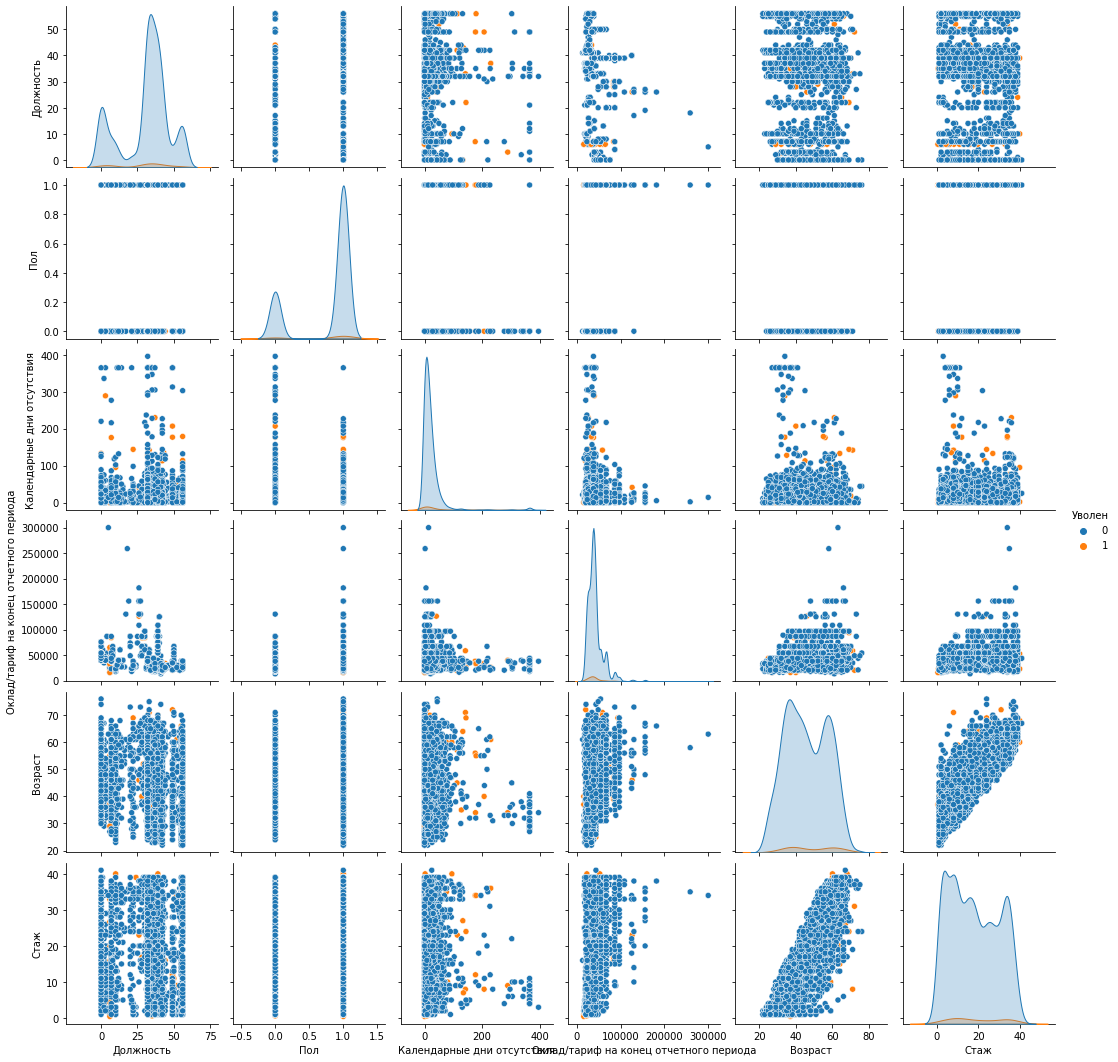

In [64]:
import seaborn as sns
sns.pairplot(data,vars=['Должность','Пол','Календарные дни отсутствия','Оклад/тариф на конец отчетного периода','Возраст','Стаж'], hue="Уволен")

<AxesSubplot:xlabel='Возраст', ylabel='Оклад/тариф на конец отчетного периода'>

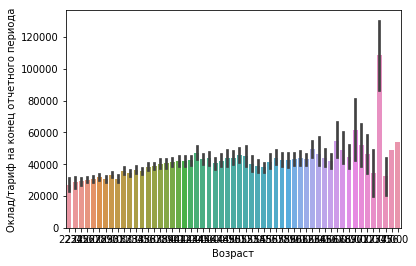

In [65]:
# Зависимость оклада от возраста
sns.barplot(data=data, x="Возраст", y="Оклад/тариф на конец отчетного периода")

<AxesSubplot:>

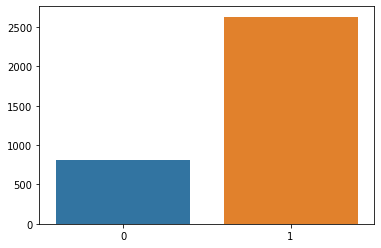

In [66]:
# Гендерное распределение сотрудников
sns.barplot(x=data['Пол'].value_counts().index.to_numpy(), y=data['Пол'].value_counts().to_numpy())

<AxesSubplot:xlabel='Должность', ylabel='Оклад/тариф на конец отчетного периода'>

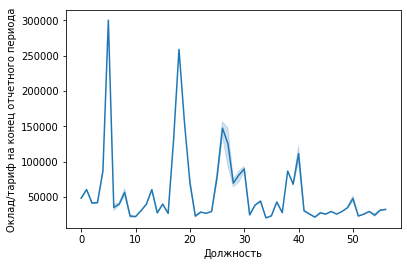

In [67]:
# средний оклад по должности
sns.lineplot(data = data, x = "Должность", y = "Оклад/тариф на конец отчетного периода")
#Очень низкий разброс 

# Создание прогнозной модели

In [68]:
y = data['Уволен']
X = data.drop('Уволен', axis=1)

In [69]:
X

,Возраст,Город в адресе регистрации на конец отчетного периода,Должность,Календарные дни отсутствия,Количество детей,Молодая кровь,Оклад/тариф на конец отчетного периода,Пол,Сезон,Семейное положение,Стаж,Образование,Изменение должности,Отдел,Вовлеченность,Удобство рабочего графика
ID,,,,,,,,,,,,,,,,
23855133.0,64.0,6,0,133.0,3.0,0,42300.0,1,3,2,27.0,1,1,3,0.67,1
23866165.0,40.0,6,49,207.0,2.0,0,33600.0,0,4,2,8.0,0,1,6,0.29,1
23858052.0,68.0,6,39,2.0,2.0,0,52500.0,1,3,2,40.0,1,1,6,0.36,1
23865091.0,64.0,6,0,5.0,1.0,0,42300.0,0,3,3,15.0,1,1,6,0.50,1
23866136.0,37.0,6,7,1.0,2.0,0,22300.0,1,3,3,8.0,1,1,6,0.68,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23865655.0,36.0,6,0,23.0,2.0,0,54180.0,1,0,2,11.0,2,0,9,0.75,1
23866799.0,26.0,0,32,13.0,0.0,1,43660.0,1,0,4,3.0,0,0,0,0.49,0
23854753.0,46.0,6,39,28.0,2.0,0,67080.0,1,0,2,20.0,2,0,9,0.23,1


In [70]:
y

ID
23855133.0    1
23866165.0    1
23858052.0    1
23865091.0    1
23866136.0    1
             ..
23865655.0    0
23866799.0    0
23854753.0    0
23864575.0    0
23857576.0    0
Name: Уволен, Length: 3450, dtype: int32

# тестирование стандартных моделей


In [71]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2, random_state=43)

In [72]:
y_train.value_counts()/y_train.shape[0]

0    0.962319
1    0.037681
Name: Уволен, dtype: float64

In [73]:
y_test.value_counts()/y_test.shape[0]

0    0.962319
1    0.037681
Name: Уволен, dtype: float64

In [74]:
import sklearn
from sklearn.metrics import classification_report, confusion_matrix

def train(model):  
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    return model

In [78]:
from sklearn.linear_model import LogisticRegression
model1 = train(LogisticRegression())

[[664   0]
 [  8  18]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       664
           1       1.00      0.69      0.82        26

    accuracy                           0.99       690
   macro avg       0.99      0.85      0.91       690
weighted avg       0.99      0.99      0.99       690



In [80]:
from sklearn.neighbors import KNeighborsClassifier
model2 = train(KNeighborsClassifier())

[[662   2]
 [  9  17]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       664
           1       0.89      0.65      0.76        26

    accuracy                           0.98       690
   macro avg       0.94      0.83      0.87       690
weighted avg       0.98      0.98      0.98       690



In [81]:
pred = model2.predict(X)

In [82]:
X['pred'] = pred

In [83]:
X['real'] = y

In [84]:
X['srav'] = X['pred']

In [85]:
attention = X[(X['pred']==1) & (X['real']==0)].drop(['pred','real'],axis=1)

In [86]:
attention.index

Float64Index([23864547.0, 23866964.0, 23857262.0, 23864578.0, 23855927.0,
              23863267.0, 23865161.0, 23863650.0, 23867043.0],
             dtype='float64', name='ID')

In [87]:
data1 = pd.read_csv('./result.csv')

In [88]:
data1['q'] = data1['ID'].apply(lambda x: x in attention.index)

# Потенциально утекающие кадры

In [89]:
attention

,Возраст,Город в адресе регистрации на конец отчетного периода,Должность,Календарные дни отсутствия,Количество детей,Молодая кровь,Оклад/тариф на конец отчетного периода,Пол,Сезон,Семейное положение,Стаж,Образование,Изменение должности,Отдел,Вовлеченность,Удобство рабочего графика,srav
ID,,,,,,,,,,,,,,,,,
23864547.0,39.0,6,7,16.0,1.0,0,36800.0,1,0,2,17.0,2,0,3,0.36,1,1
23866964.0,27.0,6,6,2.0,1.0,1,15900.0,1,0,2,2.0,2,1,2,0.05,0,1
23857262.0,46.0,6,0,0.0,4.0,0,42300.0,1,0,2,25.0,2,0,0,0.46,0,1
23864578.0,61.0,6,41,21.0,2.0,0,13210.0,0,0,2,16.0,1,0,1,0.80,1,1
23855927.0,67.0,6,36,11.0,2.0,0,42300.0,1,0,2,31.0,0,0,0,0.76,1,1
23863267.0,66.0,6,42,0.0,3.0,0,28600.0,1,0,2,18.0,1,0,2,0.88,1,1
23865161.0,63.0,6,42,0.0,2.0,0,32300.0,1,0,2,15.0,1,0,4,0.43,1,1
23863650.0,45.0,6,0,8.0,2.0,0,42300.0,1,0,2,18.0,0,0,4,0.59,1,1
23867043.0,36.0,6,6,38.0,2.0,0,36800.0,0,0,3,2.0,1,1,1,0.39,1,1


In [90]:
# Выгрузка
data1[data1['q']].drop(['q'],axis=1).to_excel('./attention.xlsx')